# 参数估计

In [2]:
data = pd.read_csv('./house_price_gr.csv',encoding='GBK')
data[:5]

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


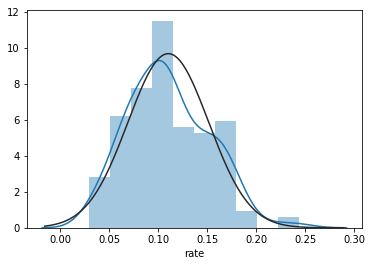

In [18]:
import seaborn as sns
from scipy import stats
sns.distplot(data.rate,kde=True,fit=stats.norm)

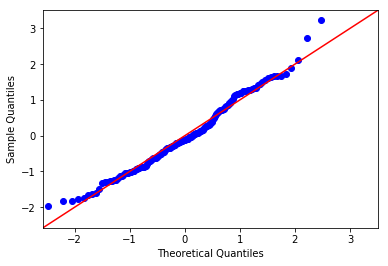

In [32]:
import statsmodels.api as sm
fig = sm.qqplot(data.rate,fit=True,line='45') #qq图，样本点与直线越接近说明变量越趋于正太分布

In [33]:
se = data.rate.std()/len(data.rate) ** 0.5
lb = data.rate.mean() - 1.98 * se
ub = data.rate.mean() + 1.98 * se
lb,ub

(0.10337882853175007, 0.11674316487209624)

In [35]:
# 如果要求任意置信度下的置信区间的话，可以自己编一个函数
def confint(x, alpha=0.05):
    n = len(x)
    xb = x.mean()
    df = n-1
    tmp = (x.std() / n ** 0.5) * stats.t.ppf(1-alpha/2, df)
    return {'Mean': xb, 'Degree of Freedom':df, 'LB':xb-tmp, 'UB':xb+tmp}

confint(data.rate, 0.05)

{'Mean': 0.11006099670192315,
 'Degree of Freedom': 149,
 'LB': 0.10339228338892809,
 'UB': 0.11672971001491822}

In [51]:
# 或者使用DescrStatsW
d1 = sm.stats.DescrStatsW(data.rate)
d1.tconfint_mean(0.05) # 

(0.10339228338892814, 0.11672971001491828)

# 假设检验与单样本T检验
当年住宅价格的增长率是否超过了10%的阈值

In [52]:
't-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(0.1)
#一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690

't-statistic=2.9812, p-value=0.0034, df=149.0'